# This is the 2nd ipynb file. This file has done all the necessary installation needed for tensorflow object detection, and trained & evaluated the model.
Kindly go to the first file: <b> imagesdata_collection.ipynb</b> file that is in same repo to collect the real-time imagedata to train the model.

In [1]:
import os

In [9]:
custom_model_name='ssd_mobnet'
pretrained_model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
tfrecord_script_name = 'generate_tfrecord.py'
label_map_name = 'label_map.pbtxt'

In [17]:
paths = { 
    'workspace_path': os.path.join('Tensorflow', 'workspace'),
    'api_model_path': os.path.join('Tensorflow', 'models'),
    'protoc_path': os.path.join('Tensorflow', 'protoc'),
    'script_path': os.path.join('Tensorflow','script'),
    'image_path': os.path.join('Tensorflow','workspace','images'),
    'pretrained_model_path': os.path.join('Tensorflow','workspace','pretrained_model'),
    'model_path': os.path.join('Tensorflow','workspace','models'),
    'annotations_path': os.path.join('Tensorflow','workspace','annotations'),
    'checkpoint_path': os.path.join('Tensorflow', 'workspace','models',custom_model_name),
    'output_path': os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'export'), 
    'tfjs_path':os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'tfjsexport'), 
    'tflite_path':os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'tfliteexport')

}

In [18]:
for key,values in paths.items():
    print(f'{key}:{values}\n')

workspace_path:Tensorflow/workspace

api_model_path:Tensorflow/models

protoc_path:Tensorflow/protoc

script_path:Tensorflow/script

image_path:Tensorflow/workspace/images

pretrained_model_path:Tensorflow/workspace/pretrained_model

model_path:Tensorflow/workspace/models

annotations_path:Tensorflow/workspace/annotations

checkpoint_path:Tensorflow/workspace/models/ssd_mobnet

output_path:Tensorflow/workspace/models/ssd_mobnet/export

tfjs_path:Tensorflow/workspace/models/ssd_mobnet/tfjsexport

tflite_path:Tensorflow/workspace/models/ssd_mobnet/tfliteexport



In [11]:
files = {
    
    'labelmap_file': os.path.join(paths['annotations_path'],label_map_name),
    'tfrecord_script': os.path.join(paths['script_path'],tfrecord_script_name),
    'pipeline_config': os.path.join(paths['checkpoint_path'],'pipeline.config')
    
}

In [12]:
for key,values in files.items():
    print(f'{key}:{values}\n')

labelmap_file:Tensorflow/workspace/annotations/label_map.pbtxt

tfrecord_script:Tensorflow/script/generate_tfrecord.py

pipeline_config:Tensorflow/workspace/models/ssd_mobnet/pipeline.config



In [19]:
for value in paths.values():
    if not os.path.exists(value):
        if os.name=='posix':
            !mkdir -p {value}
        if os.name == 'nt':
            !mkdir {value}

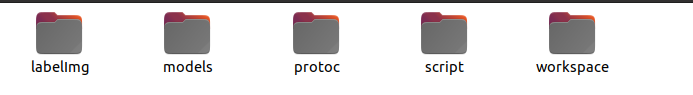

# TF object detection model from tf model garden

https://github.com/tensorflow/models

In [15]:
if not os.path.exists(os.path.join(paths['api_model_path'],'research','object_detection')):
    !git clone git@github.com:tensorflow/models.git {paths['api_model_path']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 78956, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 78956 (delta 143), reused 276 (delta 135), pack-reused 78659
Receiving objects: 100% (78956/78956), 593.86 MiB | 2.92 MiB/s, done.
Resolving deltas: 100% (56124/56124), done.
Updating files: 100% (3243/3243), done.


Downloading and compiling the Protocol Buffer, and installing all the necessary dependencies for tf object detection.

https://github.com/protocolbuffers/protobuf/releases

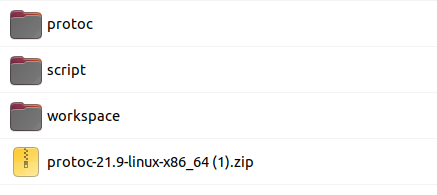

Run all the belows' command in sequense. After running <b> python3 -m pip install .</b> all the dependencies will start to download. If any error occurs, rerun the command again.

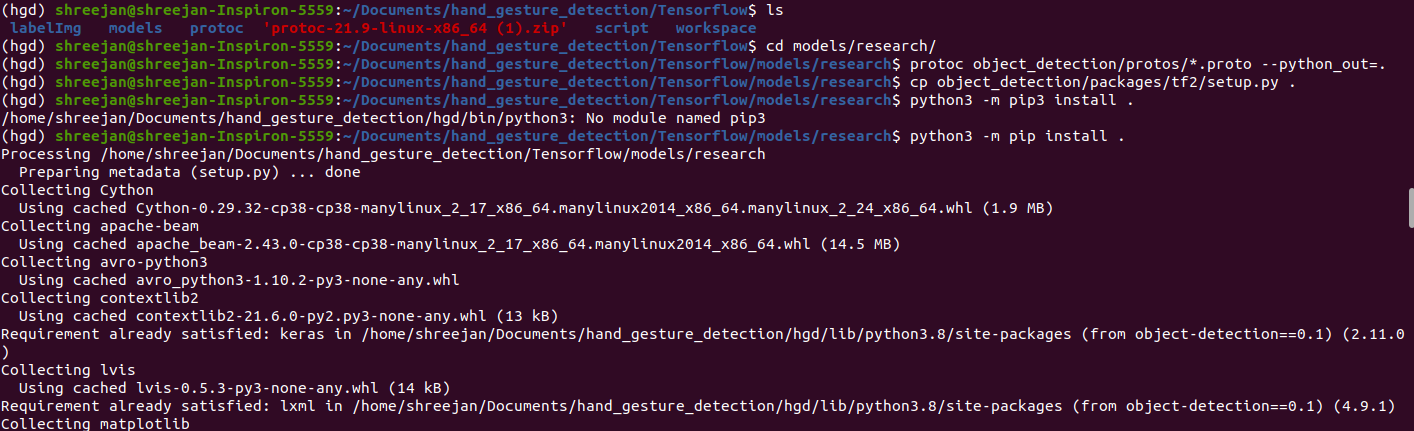

After this, run below command. This command's output will say whether our all of the installations are done perfectly or not.

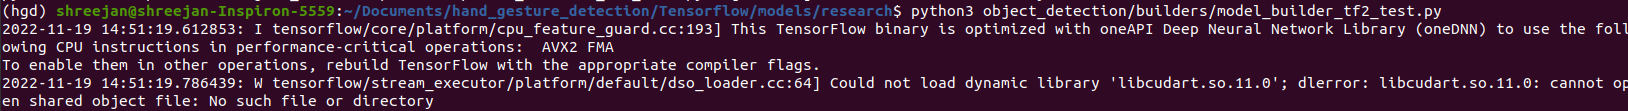

If you see OK on your terminal like below then you are go to good ahead.

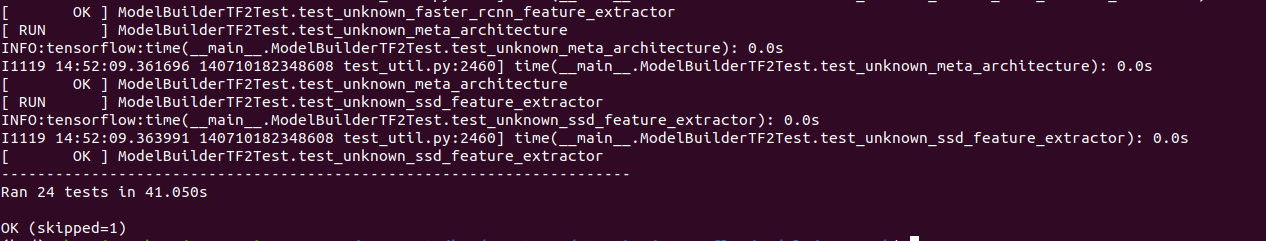

# Creating the label map

In [21]:
labels = [{'name':'thumbsup', 'id':1}, {'name':'thumbsdown', 'id':2}]

with open(files['labelmap_file'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

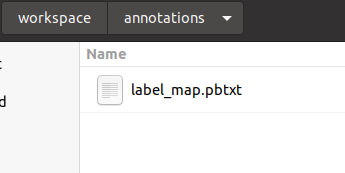

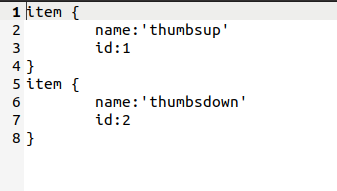

Creating the TFrecords of our imagedata.

In [22]:
if not os.path.exists(files['tfrecord_script']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['script_path']}

Cloning into 'Tensorflow/script'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.67 KiB | 2.67 MiB/s, done.


In [23]:
!python {files['tfrecord_script']} -x {os.path.join(paths['image_path'], 'train')} -l {files['labelmap_file']} -o {os.path.join(paths['annotations_path'], 'train.record')} 
!python {files['tfrecord_script']} -x {os.path.join(paths['image_path'], 'validation')} -l {files['labelmap_file']} -o {os.path.join(paths['annotations_path'], 'validation.record')} 

2022-11-19 15:15:31.562563: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
2022-11-19 15:15:34.875321: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: Tensorflow/workspace/annotations/validation.record


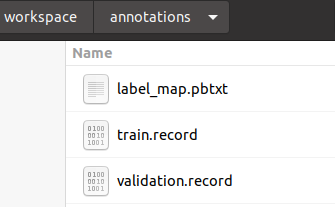

<b> Copy the pipeline.config file from pretrained_model to models </b>

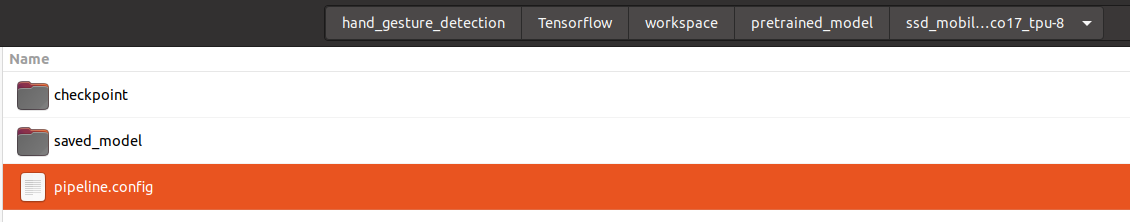

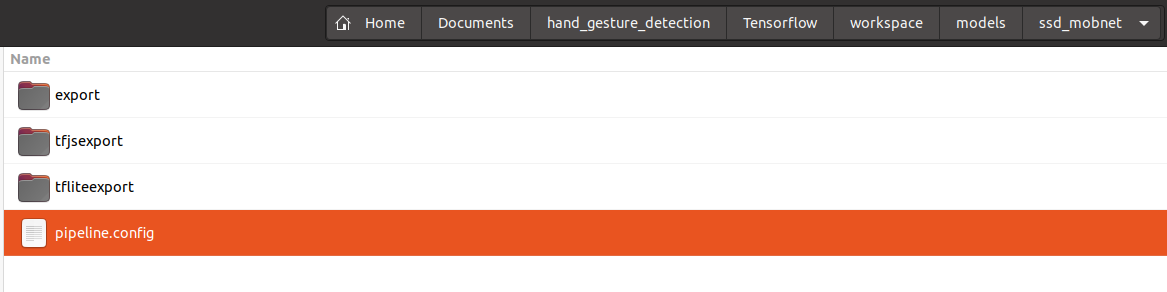

# IMPORTANT STEP!

Below code will download the selected pretrained object detection model and uncompress it using linux's tar command. Now, we are using ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.

In [20]:
if os.name =='posix': #for linux
    !wget {pretrained_model_url}
    !mv {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}
    
if os.name == 'nt': #for windows
    wget.download(pretrained_model_url)
    !move {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}

--2022-11-19 15:06:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 2404:6800:4009:824::2010, 142.250.183.144
Connecting to download.tensorflow.org (download.tensorflow.org)|2404:6800:4009:824::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  2.75MB/s    in 6.9s    

2022-11-19 15:07:00 (2.82 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x32

# NOW,

Below, I have printed the model's original configuration. We have to adjust it according to our need. Kindly go to Tensorflow/workspace/models/ssd_mobnet/pipeline_config and open the file.

In [26]:
from object_detection.utils import config_util
config = config_util.get_configs_from_pipeline_file(files['pipeline_config'])
print(config)

{'model': ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 320
      width: 320
    }
  }
  feature_extractor {
    type: "ssd_mobilenet_v2_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 3.9999998989515007e-05
        }
      }
      initializer {
        random_normal_initializer {
          mean: 0.0
          stddev: 0.009999999776482582
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    use_depthwise: true
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
      additional_layer_depth: 128
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_thresh

After opening the pipeline.config file from where ever you want (in my case, I use Vscode), modify it according your custom model need. Since, I have two classes (thumbsup and thumbsdown), I have set the num_classes:2

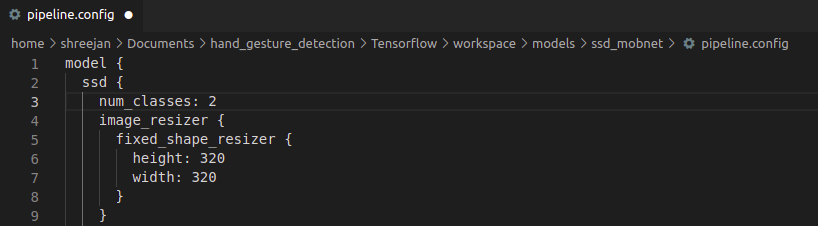

For now, I set the batch_size:4 I 

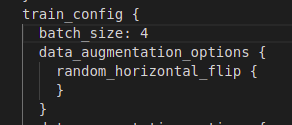

Below's two screenshots have a couple of things to edit.

1)fine_tune_checkpoint

2)fine_tune_checkpoint_type (set this to detection since we are doing detection)

3)label_map_path

4)input_path

For 1,3,4 give the exact same path.

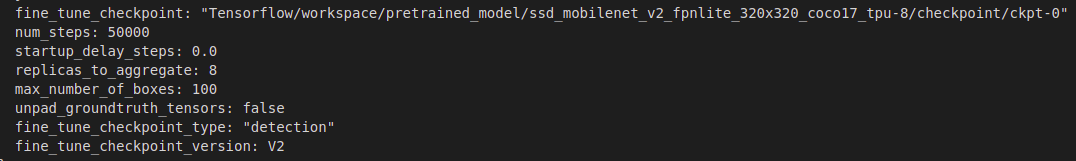

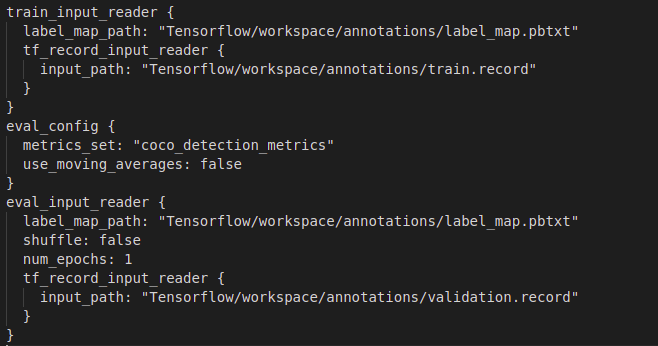

Save the file and close it.

# Training our model

In [27]:
training_script = os.path.join(paths['api_model_path'], 'research', 'object_detection', 'model_main_tf2.py')

In [28]:
training_script

'Tensorflow/models/research/object_detection/model_main_tf2.py'

In [32]:
command = f"python3 {training_script} --model_dir={paths['checkpoint_path']} --pipeline_config_path={files['pipeline_config']} --num_train_steps=2000"

In [34]:
print(command)
#copy and run it in your terminal.

python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/ssd_mobnet/pipeline.config --num_train_steps=2000


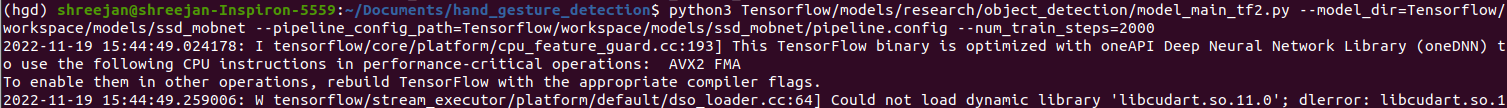

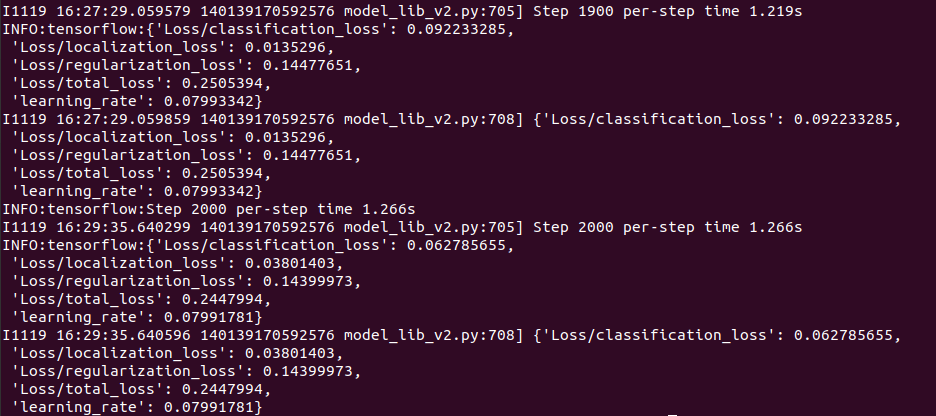